# Team JM2 Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

We {**TEAM JM2**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section we imported and briefly discussed the libraries that will be used throughout the analysis and modelling. |

---

In [7327]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt


# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn import *
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr


# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section we are to load the data from the `df_train` file into a DataFrame. |

---

In [7328]:
df = pd.read_csv('df_train.csv')
df.head(20)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667
5,5,2015-01-01 18:00:00,1.000000,level_7,0.0,1.000000,69.666667,67.333333,12.333333,0.666667,...,274.639229,284.165625,277.919000,277.919000,284.165625,277.919000,282.077844,274.639229,274.639229,6842.000000
6,6,2015-01-01 21:00:00,1.000000,level_8,0.0,1.000000,83.666667,63.333333,16.333333,1.000000,...,268.287000,283.420333,274.295437,274.295437,283.420333,274.295437,277.637000,268.287000,268.287000,10760.333333
7,7,2015-01-02 00:00:00,1.000000,level_9,0.0,1.000000,83.666667,64.000000,8.666667,1.333333,...,266.882333,282.474000,272.903167,272.903167,282.474000,272.903167,276.457333,266.882333,266.882333,10866.000000
8,8,2015-01-02 03:00:00,1.000000,level_9,0.0,1.000000,86.000000,63.333333,5.333333,1.000000,...,266.226667,281.726667,271.780115,271.780115,281.726667,271.780115,276.151667,266.226667,266.226667,-1850.333333
9,9,2015-01-02 06:00:00,1.000000,level_9,0.0,1.333333,87.000000,63.666667,15.333333,1.000000,...,266.878000,281.803000,271.673667,271.673667,281.803000,271.673667,276.453000,266.878000,266.878000,-4002.333333


**After loading the data, we can see the data is still raw, the data consists of 20 rows and 49 columns. There is a lot of predictor variables to work with. It is most likely that many of these predictor variables are not going to be useful to our cause. This brings us to the next data science process which is the Exploratory Data Analysis.**

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section we are going to perform an in-depth analysis of all the variables in the DataFrame. This would give us proper knowledge of our predictor variables to know if they are useful in this project.

---


In [7329]:
# look at data statistics
df.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


From the statistics, we can clearly see the maximum, minimum and mean of all the predictor variables as well
as the target variable.

In [7330]:
# showing the columns
df.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

This was carried out to be able to know all our features. From the above, it can be seen there are a very 
good number of features in our dataset.

In [7331]:
#data statistics continues
df.skew()

Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

The skewness helps us see how our various features tends away from the mean. Some of these features
are not distributed normally. 

In [7332]:
#checking the kurtosis to see if there are outliers in our dataset
df.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

After running kurtosis, it can be seen that there are outliers in some of our features. Features such as;

Barcelona_rain_1h       
Seville_rain_1h           
Bilbao_snow_3h           
Barcelona_pressure      
Seville_rain_3h          
Madrid_rain_1h            
Barcelona_rain_3h       
Valencia_snow_3h        

 
 All these features have many outliers. Since the outliers are many in each of these features, we are going
 to drop these features later on in order to avoid them affecting the outcome.

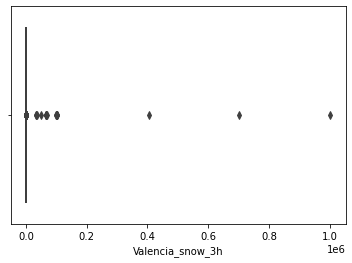

In [7333]:
#Visualising the outliers with boxplot
sns.boxplot(x='Barcelona_rain_1h', data=df);
sns.boxplot(x='Seville_rain_1h', data=df);
sns.boxplot(x='Bilbao_snow_3h', data=df);
sns.boxplot(x='Barcelona_pressure', data=df);
sns.boxplot(x='Seville_rain_3h', data=df);
sns.boxplot(x='Madrid_rain_1h', data=df);
sns.boxplot(x='Barcelona_rain_3h', data=df);
sns.boxplot(x='Valencia_snow_3h', data=df);


From the plots, we can see there are so many outliers in these features. Therefore, we need to drop these features after merging our two datasets so they do not affect the outcome.

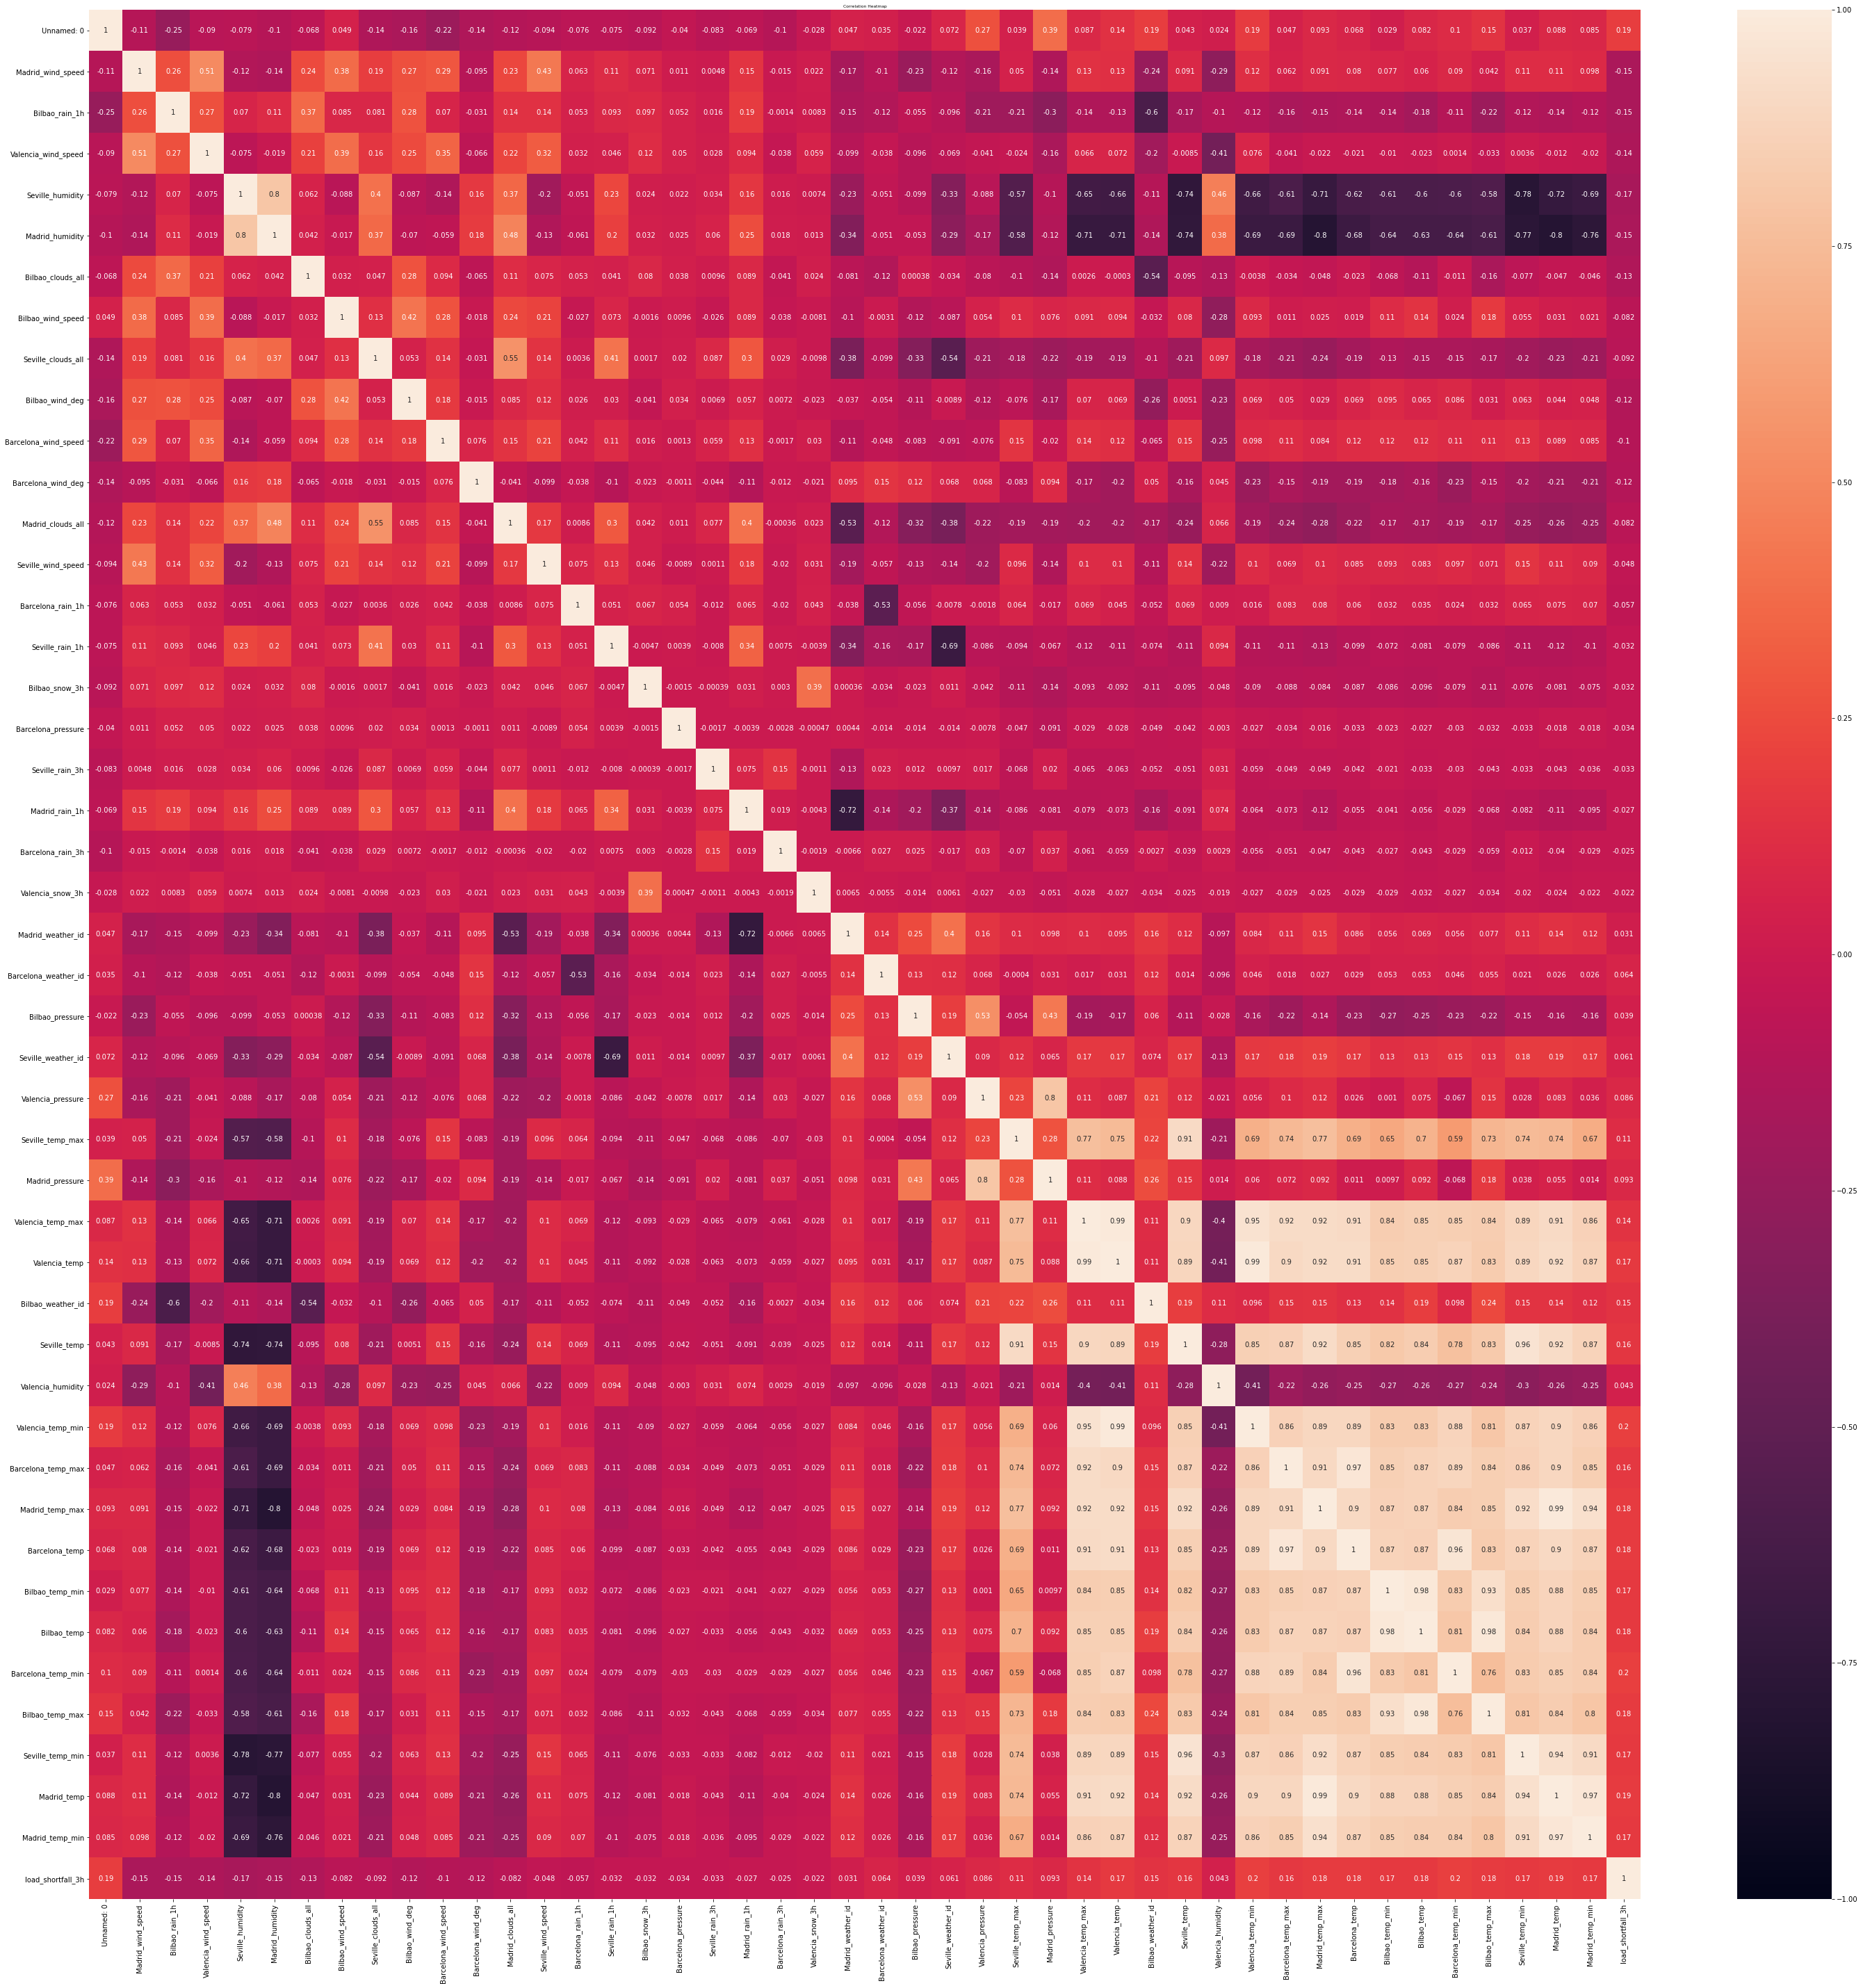

In [7349]:
# plot relevant feature interactions
##Checking for Multicollinearity
plt.figure(figsize=(50, 50))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':6}, pad=3);

From the correlation heatmap, it is obvious there is presence of multicollinearity in our dataset. If left unattended to, it can cause problem in our output. There is collinearity between the following features;

Valencia_temp & Valencia_temp_max

Valencia_temp & Valencia_temp_min

Seville_temp & Seville_temp_max

Seville_temp & Seville_temp_min

Barcelona_temp & Barcelona_temp_max

Barcelona_temp & Barcelona_temp_min

Bilbao_temp & Bilbao_temp_max

Bilbao_temp & Bilbao_temp_min

Madrid_temp & Madrid_temp_max

Madrid_temp & Madrid_temp_min

For multicollinearity not affect output, we are going to drop one feature from each multicollinearity later on. 


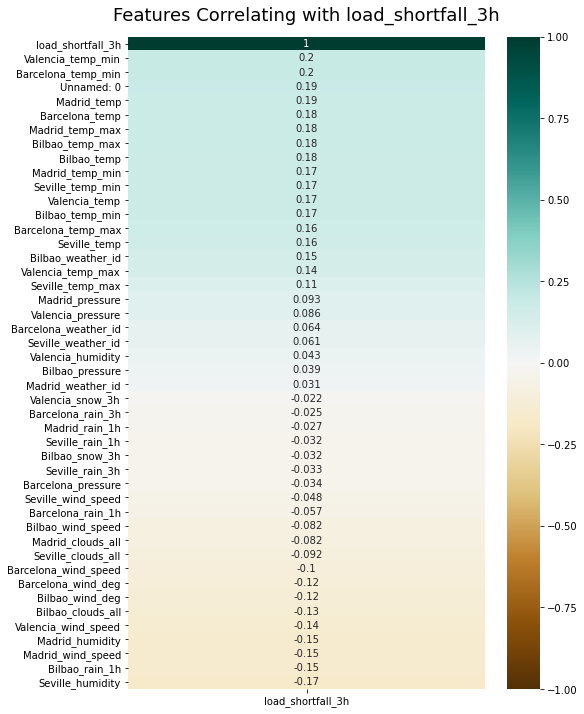

In [7337]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['load_shortfall_3h']].sort_values(by='load_shortfall_3h', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with load_shortfall_3h', fontdict={'fontsize':18}, pad=16);


After drawing the correlation between each of the predictor variables and the load_shortfall_3h target variable, we now have better knowledge of our dataset; some of these predictors are in no way correlated to our target variable, meaning, they are not going to help in predicting the target variable. Due to this, we are going to drop them later on when we join our two datasets for cleaning.

From the correlation, it can be seen that the features are weakly correlated to the target variable(load_shortfall_3h). 

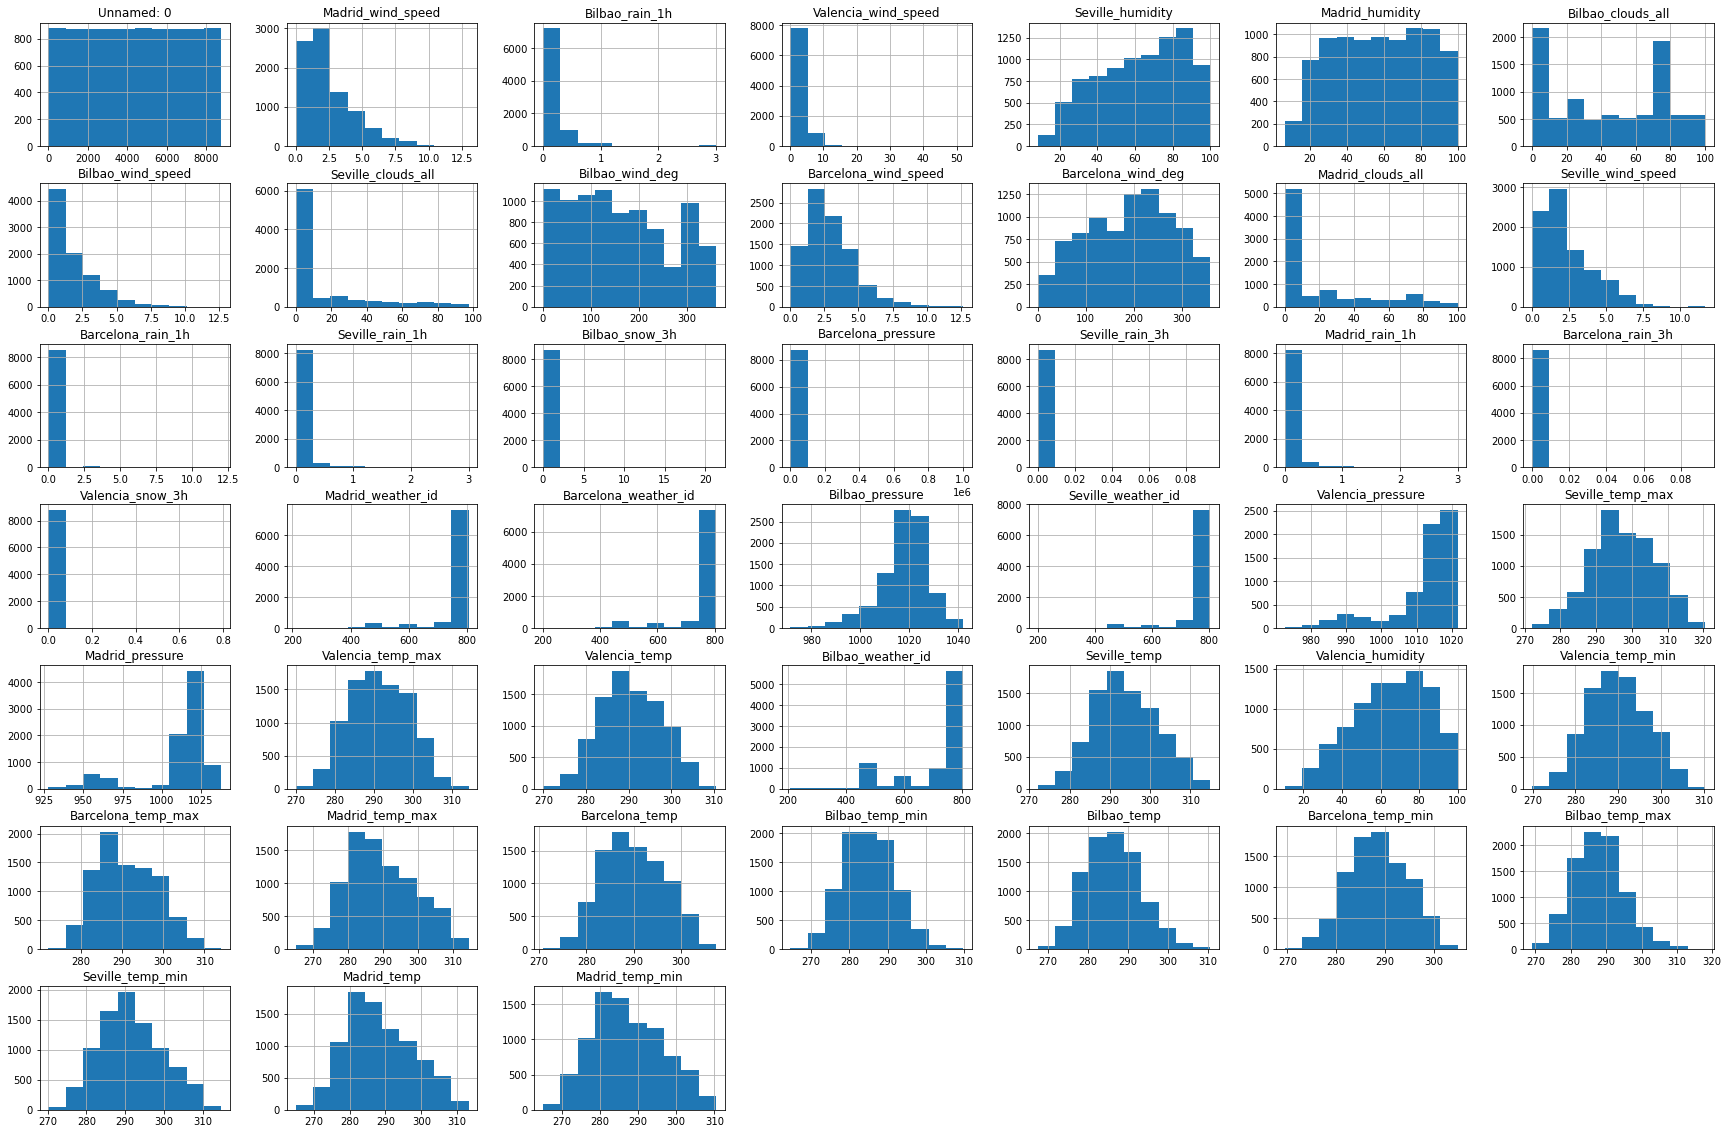

In [7356]:
# have a look at feature distributions
features = ['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
       'Madrid_temp', 'Madrid_temp_min'] # create a list of all numerical features
df[features].hist(figsize=(30,20));


From the distribution plot, it is seen that some of these features are very much normally distributed. Features that are normally distributed includes:

Seville_temp

Valencia_humidity

Valencia_temp_min

Barcelona_temp_max

Madrid_temp_max

Barcelona_temp 

Bilbao_temp_min 

Bilbao_temp

Barcelona_temp_min 

Bilbao_temp_max 

Seville_temp_min

Madrid_temp

Madrid_temp_min

Valencia_temp_max

Valencia_temp

Seville_temp_max

Bilbao_pressure

Barcelona_wind_speed

Seville_humidity

Madrid_humidity

Bilbao_wind_deg

This shows these features are well distributed around their mean and also shows the lack of outliers in these features.



<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section we are going to: clean the dataset, and possibly create new features - as identified in the EDA phase. This is the phase where we drop the features we identified to drop in the EDA phase|
---

In [7359]:
#merging the train-test dataset in order to do cleaning and manipulation once
# load in the test data
df2 = pd.read_csv('df_test.csv')

We load the test dataset in order to merge with the train dataset so as to do the cleaning and manipulations once.

In [7360]:
df_merge = pd.concat([df, df2])
df_merge.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


The two dataset are merged in order for cleaning and full feature engineering to be carried out on both at the same time.

In [7361]:
#Dropping the features with large amount of outliers
df_merge = df_merge.drop(['Barcelona_rain_1h',       
'Seville_rain_1h',           
'Bilbao_snow_3h',           
'Barcelona_pressure',      
'Seville_rain_3h',          
'Madrid_rain_1h',            
'Barcelona_rain_3h',      
'Valencia_snow_3h', 'Bilbao_rain_1h'        
], axis = 1)

From the kurtosis statistics carried out earlier, we discovered there are features with outliers, we decided to
drop features with large amount of outliers so they do not affect our outcome. It is only proper to drop 
these features in this section since we just merged the two dataset.

Like we did in the EDA, the kurtosis of the dataset is carried out once more in order to know the features with outliers

In [7362]:
#checking for null values
df_merge.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Seville_pressure           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2522
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp               0
Valencia_humidity          0
Valencia_temp_min          0
Barcelona_temp_max         0
Madrid_temp_max            0
Barcelona_temp             0
Bilbao_temp_min            0
Bilbao_temp                0
Barcelona_temp

Since the two dataset are now joined, the merged dataset is checked for null or missing values in order to replace these missing values.
It can be seen that Valencia_pressure contains 2522 missing values. 

In [7364]:
percent_missing = (df_merge['Valencia_pressure'].isnull().sum()/df_merge.shape[0])*100
percent_missing

21.586921167508347

Since the percentage of missing value in Valencia_pressure is approximately 22%, we can go ahead to replace the missing values instead of dropping the features. Therefore, we need to check the statistics for Valencia_pressure and know which metric to use in replacing the missing values.

In [6854]:
#checking statistics of the column with missing values
metric1 = df_merge['Valencia_pressure'].mode()
metric2 = df_merge['Valencia_pressure'].mean()
metric3 = df_merge['Valencia_pressure'].median()
print("mode:", metric1)
print("mean:", metric2)
print("median", metric3)

mode: 0    1018.0
dtype: float64
mean: 1012.3466870428985
median 1015.0


The mean, median and mode of Valencia is found, and from the output, it is seen that the three metrics are quite close. This means any of the metric we choose would have almost the same impact as the other two.

In [6855]:
# create new features by replacing null values
df_cln = df_merge
df_cln['Valencia_pressure'] = df_cln['Valencia_pressure'].fillna(df_cln['Valencia_pressure'].mode()[0])

The mode is selected as the metric to replace the missing values. Now, we check if the missing values have been replaced.

In [6856]:
#checking null values
df_cln.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Seville_pressure           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure          0
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp               0
Valencia_humidity          0
Valencia_temp_min          0
Barcelona_temp_max         0
Madrid_temp_max            0
Barcelona_temp             0
Bilbao_temp_min            0
Bilbao_temp                0
Barcelona_temp

The missing values are hereby replaced by the mode.

In [6857]:
#checking datatype of our features
df_cln.dtypes

Unnamed: 0                int64
time                     object
Madrid_wind_speed       float64
Valencia_wind_deg        object
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Seville_pressure         object
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_pressure         float64
Valencia_temp_max       float64
Valencia_temp           float64
Bilbao_weather_id       float64
Seville_temp            float64
Valencia_humidity       float64
Valencia_temp_min       float64
Barcelona_temp_max      float64
Madrid_temp_max         float64
Barcelon

Cleaning of out data continues  as we check the datatype of each features. We need to change all our datatype to numerical in order not to experience conflict due to the datatypes of the features later on when modelling.

In [6858]:
df_cln['time']

0       2015-01-01 03:00:00
1       2015-01-01 06:00:00
2       2015-01-01 09:00:00
3       2015-01-01 12:00:00
4       2015-01-01 15:00:00
               ...         
2915    2018-12-31 09:00:00
2916    2018-12-31 12:00:00
2917    2018-12-31 15:00:00
2918    2018-12-31 18:00:00
2919    2018-12-31 21:00:00
Name: time, Length: 11683, dtype: object

The 'time' feature is an object datatype, we need to connvert it too datetime before it can be of any use to us.

In [6859]:
df_cln['time'] = pd.to_datetime(df_cln['time'])
df_cln.time

0      2015-01-01 03:00:00
1      2015-01-01 06:00:00
2      2015-01-01 09:00:00
3      2015-01-01 12:00:00
4      2015-01-01 15:00:00
               ...        
2915   2018-12-31 09:00:00
2916   2018-12-31 12:00:00
2917   2018-12-31 15:00:00
2918   2018-12-31 18:00:00
2919   2018-12-31 21:00:00
Name: time, Length: 11683, dtype: datetime64[ns]

The 'time' feature has been converted to datetime. Now, we can engineer the time feature to get suitable feature that can help our prediction.

In [6860]:
df_cln['Valencia_wind_deg']

0        level_5
1       level_10
2        level_9
3        level_8
4        level_7
          ...   
2915     level_9
2916     level_8
2917     level_6
2918     level_6
2919    level_10
Name: Valencia_wind_deg, Length: 11683, dtype: object

The 'Valencia_wind_deg' feature is an object datatype feature. It needs to be converted to int datatype.

In [6861]:
df_cln['Valencia_wind_deg']= df_cln['Valencia_wind_deg'].str.extract('(\d+)')


Extraction of the numeric value in the Valencia_wind_deg was carried out. This way, we can easily change the datatype to numeric datatype.

In [6862]:
df_cln['Valencia_wind_deg'] = pd.to_numeric(df_cln['Valencia_wind_deg'])
df_cln['Valencia_wind_deg'] 

0        5
1       10
2        9
3        8
4        7
        ..
2915     9
2916     8
2917     6
2918     6
2919    10
Name: Valencia_wind_deg, Length: 11683, dtype: int64

The Valencia_wind_deg is now in numeric datatype.

In [6863]:
df_cln.Seville_pressure = df_cln.Seville_pressure.str.extract('(\d+)')

In [6864]:
df_cln.Seville_pressure = pd.to_numeric(df_cln['Seville_pressure'])
df_cln.Seville_pressure 

0       25
1       25
2       25
3       25
4       25
        ..
2915    24
2916    24
2917    23
2918    23
2919    23
Name: Seville_pressure, Length: 11683, dtype: int64

In [6865]:
#extracting year month and day for the time column
df_cln.insert(2, 'Year', df_cln.time.dt.year) 
df_cln.insert(3,'Month',df_cln.time.dt.month)
df_cln.insert(4,'Day',df_cln.time.dt.day)


In [6866]:
df_cln = df_cln.drop(['Unnamed: 0', 'time'], axis = 1)

In [6867]:
df_cln.head()

,Year,Month,Day,Madrid_wind_speed,Valencia_wind_deg,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015,1,1,0.666667,5,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015,1,1,0.333333,10,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015,1,1,1.000000,9,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015,1,1,1.000000,8,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015,1,1,1.000000,7,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [6868]:
corrs = df_cln.corr()['load_shortfall_3h'].sort_values(ascending=False)
corrs

load_shortfall_3h       1.000000
Valencia_temp_min       0.201863
Month                   0.199048
Barcelona_temp_min      0.195984
Madrid_temp             0.186036
Barcelona_temp          0.182673
Madrid_temp_max         0.182548
Bilbao_temp_max         0.180934
Bilbao_temp             0.176411
Madrid_temp_min         0.174744
Seville_temp_min        0.174718
Valencia_temp           0.173225
Bilbao_temp_min         0.172920
Barcelona_temp_max      0.164734
Seville_temp            0.159343
Bilbao_weather_id       0.145875
Valencia_temp_max       0.144270
Year                    0.131324
Seville_temp_max        0.109834
Madrid_pressure         0.092638
Day                     0.092116
Valencia_pressure       0.090405
Barcelona_weather_id    0.063868
Seville_weather_id      0.061104
Valencia_humidity       0.043140
Bilbao_pressure         0.039052
Madrid_weather_id       0.030868
Seville_pressure       -0.030434
Seville_wind_speed     -0.048433
Bilbao_wind_speed      -0.081602
Madrid_clo

In [6869]:
#df_cln = df_cln.drop(['Barcelona_weather_id', 'Seville_weather_id', 'Valencia_humidity', 'Bilbao_pressure', 'Madrid_weather_id'], axis = 1)
#df_cln = df_cln.drop(['Valencia_snow_3h', 'Barcelona_rain_3h', 'Madrid_rain_1h', 'Seville_pressure', 'Seville_rain_1h'], axis = 1)
#df_cln = df_cln.drop(['Bilbao_snow_3h', 'Seville_rain_3h', 'Barcelona_pressure', 'Seville_wind_speed', 'Barcelona_rain_1h'], axis = 1)

In [6870]:
corrs = df_cln.corr()['load_shortfall_3h'].sort_values(ascending=False)
corrs

load_shortfall_3h       1.000000
Valencia_temp_min       0.201863
Month                   0.199048
Barcelona_temp_min      0.195984
Madrid_temp             0.186036
Barcelona_temp          0.182673
Madrid_temp_max         0.182548
Bilbao_temp_max         0.180934
Bilbao_temp             0.176411
Madrid_temp_min         0.174744
Seville_temp_min        0.174718
Valencia_temp           0.173225
Bilbao_temp_min         0.172920
Barcelona_temp_max      0.164734
Seville_temp            0.159343
Bilbao_weather_id       0.145875
Valencia_temp_max       0.144270
Year                    0.131324
Seville_temp_max        0.109834
Madrid_pressure         0.092638
Day                     0.092116
Valencia_pressure       0.090405
Barcelona_weather_id    0.063868
Seville_weather_id      0.061104
Valencia_humidity       0.043140
Bilbao_pressure         0.039052
Madrid_weather_id       0.030868
Seville_pressure       -0.030434
Seville_wind_speed     -0.048433
Bilbao_wind_speed      -0.081602
Madrid_clo

In [6871]:
# engineer existing features
#df_cln['Spain_wind_speed'] = df_cln[['Madrid_wind_speed', 'Valencia_wind_speed', 'Barcelona_wind_speed', 'Bilbao_wind_speed']].mean(axis =1)
#df_cln['Spain_temp'] = df_cln[['Seville_temp', 'Barcelona_temp', 'Bilbao_temp', 'Madrid_temp', 'Valencia_temp']].mean(axis=1)
#df_cln['Spain_temp_min'] = df_cln[['Valencia_temp_min', 'Bilbao_temp_min', 'Seville_temp_min', 'Madrid_temp_min', 'Barcelona_temp_min']].mean(axis = 1)
#df_cln['Spain_temp_max'] = df_cln[['Valencia_temp_max', 'Bilbao_temp_max', 'Seville_temp_max', 'Madrid_temp_max', 'Barcelona_temp_max']].mean(axis = 1)

In [6872]:
df_cln = df_cln.drop(['Valencia_temp_min', 'Madrid_temp', 'Barcelona_temp', 'Madrid_temp_max' ], axis = 1)
df_cln = df_cln.drop(['Bilbao_temp_max', 'Bilbao_temp', 'Madrid_temp_min', 'Seville_temp_min'], axis = 1)
df_cln = df_cln.drop(['Valencia_temp', 'Bilbao_temp_min', 'Barcelona_temp_max', 'Seville_temp' ], axis = 1)
df_cln = df_cln.drop(['Bilbao_weather_id', 'Valencia_temp_max', 'Seville_temp_max', 'Barcelona_weather_id'], axis = 1)
df_cln = df_cln.drop(['Seville_weather_id', 'Madrid_weather_id'], axis = 1)
df_cln = df_cln.drop(['Madrid_clouds_all', 'Seville_clouds_all'], axis = 1)

In [6873]:
#df_cln = df_cln.drop(['Madrid_temp', 'Madrid_temp_max'], axis = 1)
#df_cln = df_cln.drop(['Valencia_temp', 'Bilbao_temp_min'], axis = 1)
#df_cln = df_cln.drop(['Barcelona_temp_max', 'Valencia_temp_max','Madrid_temp_min', 'Bilbao_temp'], axis = 1)
#df_cln = df_cln.drop(['Seville_weather_id', 'Madrid_weather_id', 'Valencia_snow_3h', 'Barcelona_rain_3h'], axis = 1)
#df_cln = df_cln.drop(['Madrid_rain_1h', 'Seville_rain_1h', 'Bilbao_snow_3h', 'Seville_rain_3h', 'Barcelona_rain_1h'], axis = 1)
#df_cln = df_cln.drop(['Seville_temp_max', 'Bilbao_weather_id',  'Bilbao_rain_1h', 'Seville_temp', 'Bilbao_temp_max', 'Seville_temp_min'], axis = 1)

In [6874]:
#df_cln = #df_cln.drop(['Valencia_humidity', 'Bilbao_pressure', 'Seville_pressure', 'Barcelona_pressure', 'Seville_wind_speed'], axis = 1)

In [6875]:
corrs = df_cln.corr()['load_shortfall_3h'].sort_values(ascending=False)
corrs

load_shortfall_3h       1.000000
Month                   0.199048
Barcelona_temp_min      0.195984
Year                    0.131324
Madrid_pressure         0.092638
Day                     0.092116
Valencia_pressure       0.090405
Valencia_humidity       0.043140
Bilbao_pressure         0.039052
Seville_pressure       -0.030434
Seville_wind_speed     -0.048433
Bilbao_wind_speed      -0.081602
Barcelona_wind_speed   -0.103633
Barcelona_wind_deg     -0.116133
Bilbao_wind_deg        -0.120800
Bilbao_clouds_all      -0.127293
Valencia_wind_speed    -0.142791
Madrid_humidity        -0.150536
Madrid_wind_speed      -0.150981
Seville_humidity       -0.167290
Valencia_wind_deg      -0.188674
Name: load_shortfall_3h, dtype: float64

In [6876]:
df_cln.head()

,Year,Month,Day,Madrid_wind_speed,Valencia_wind_deg,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_wind_speed,Barcelona_wind_deg,Seville_wind_speed,Seville_pressure,Bilbao_pressure,Valencia_pressure,Madrid_pressure,Valencia_humidity,Barcelona_temp_min,load_shortfall_3h
0,2015,1,1,0.666667,5,0.666667,74.333333,64.000000,0.0,1.000000,...,6.333333,42.666667,3.333333,25,1035.000000,1002.666667,971.333333,75.666667,281.013000,6715.666667
1,2015,1,1,0.333333,10,1.666667,78.333333,64.666667,0.0,1.000000,...,4.000000,139.000000,3.333333,25,1035.666667,1004.333333,972.666667,71.000000,280.561667,4171.666667
2,2015,1,1,1.000000,9,1.000000,71.333333,64.333333,0.0,1.000000,...,2.000000,326.000000,2.666667,25,1036.000000,1005.333333,974.000000,65.666667,281.583667,4274.666667
3,2015,1,1,1.000000,8,1.000000,65.333333,56.333333,0.0,1.000000,...,2.333333,273.000000,4.000000,25,1036.000000,1009.000000,994.666667,54.000000,283.434104,5075.666667
4,2015,1,1,1.000000,7,1.000000,59.000000,57.000000,2.0,0.333333,...,4.333333,260.000000,3.000000,25,1035.333333,1018.000000,1035.333333,58.333333,284.213167,6620.666667


In [6877]:
df_cln.dtypes

Year                      int64
Month                     int64
Day                       int64
Madrid_wind_speed       float64
Valencia_wind_deg         int64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Seville_wind_speed      float64
Seville_pressure          int64
Bilbao_pressure         float64
Valencia_pressure       float64
Madrid_pressure         float64
Valencia_humidity       float64
Barcelona_temp_min      float64
load_shortfall_3h       float64
dtype: object

In [6878]:
df_cln.columns

Index(['Year', 'Month', 'Day', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Bilbao_wind_deg',
       'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Seville_wind_speed',
       'Seville_pressure', 'Bilbao_pressure', 'Valencia_pressure',
       'Madrid_pressure', 'Valencia_humidity', 'Barcelona_temp_min',
       'load_shortfall_3h'],
      dtype='object')

In [6879]:
#df_cln = df_cln.drop(['Bilbao_rain_1h','Valencia_temp_max'], axis = 1)
#df_cln = df_cln.drop(['Valencia_temp', 'Bilbao_weather_id', 'Seville_temp'], axis = 1)
#df_cln = df_cln.drop(['Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp', 'Madrid_temp_min'], axis = 1)
#df_cln = df_cln.drop(['Valencia_temp_min', 'Bilbao_temp_min', 'Seville_temp_min', 'Madrid_temp_min', 'Barcelona_temp_min'], axis = 1)
#df_cln = df_cln.drop(['Valencia_temp_max', 'Bilbao_temp_max', 'Seville_temp_max', 'Madrid_temp_max', 'Barcelona_temp_max'], axis = 1)
#df_cln = df_cln.drop(['Year', 'Day'], axis = 1)


In [6880]:
df_cln.head()

,Year,Month,Day,Madrid_wind_speed,Valencia_wind_deg,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_wind_speed,Barcelona_wind_deg,Seville_wind_speed,Seville_pressure,Bilbao_pressure,Valencia_pressure,Madrid_pressure,Valencia_humidity,Barcelona_temp_min,load_shortfall_3h
0,2015,1,1,0.666667,5,0.666667,74.333333,64.000000,0.0,1.000000,...,6.333333,42.666667,3.333333,25,1035.000000,1002.666667,971.333333,75.666667,281.013000,6715.666667
1,2015,1,1,0.333333,10,1.666667,78.333333,64.666667,0.0,1.000000,...,4.000000,139.000000,3.333333,25,1035.666667,1004.333333,972.666667,71.000000,280.561667,4171.666667
2,2015,1,1,1.000000,9,1.000000,71.333333,64.333333,0.0,1.000000,...,2.000000,326.000000,2.666667,25,1036.000000,1005.333333,974.000000,65.666667,281.583667,4274.666667
3,2015,1,1,1.000000,8,1.000000,65.333333,56.333333,0.0,1.000000,...,2.333333,273.000000,4.000000,25,1036.000000,1009.000000,994.666667,54.000000,283.434104,5075.666667
4,2015,1,1,1.000000,7,1.000000,59.000000,57.000000,2.0,0.333333,...,4.333333,260.000000,3.000000,25,1035.333333,1018.000000,1035.333333,58.333333,284.213167,6620.666667


In [6881]:
corrs = df_cln.corr()['load_shortfall_3h'].sort_values(ascending=False)
corrs

load_shortfall_3h       1.000000
Month                   0.199048
Barcelona_temp_min      0.195984
Year                    0.131324
Madrid_pressure         0.092638
Day                     0.092116
Valencia_pressure       0.090405
Valencia_humidity       0.043140
Bilbao_pressure         0.039052
Seville_pressure       -0.030434
Seville_wind_speed     -0.048433
Bilbao_wind_speed      -0.081602
Barcelona_wind_speed   -0.103633
Barcelona_wind_deg     -0.116133
Bilbao_wind_deg        -0.120800
Bilbao_clouds_all      -0.127293
Valencia_wind_speed    -0.142791
Madrid_humidity        -0.150536
Madrid_wind_speed      -0.150981
Seville_humidity       -0.167290
Valencia_wind_deg      -0.188674
Name: load_shortfall_3h, dtype: float64

In [6882]:
df_cln.shape

(11683, 21)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [7268]:
# split data
y = df_cln[:len(df)][['load_shortfall_3h']]
x = df_cln[:len(df)].drop('load_shortfall_3h', axis = 1)


In [7269]:
from sklearn.ensemble import ExtraTreesRegressor

In [7270]:
modelz = ExtraTreesRegressor()
modelz.fit(x,y)

<ipython-input-7270-cc023e982fb3>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelz.fit(x,y)


ExtraTreesRegressor()

In [7271]:
print(modelz.feature_importances_)

[0.06747828 0.11607889 0.18630397 0.03876612 0.04763791 0.03119343
 0.03935603 0.03645313 0.03714209 0.03239246 0.03199645 0.03072506
 0.03443338 0.03123631 0.03790572 0.04468199 0.03381375 0.03139733
 0.03173613 0.05927156]


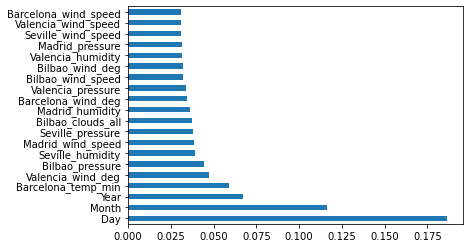

In [7272]:
feat_importances = pd.Series(modelz.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [7273]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [7274]:
import xgboost as xgb

In [7275]:
xgbr = xgb.XGBRegressor(verbosity=0)

In [7276]:
# Import train/test split module
from sklearn.model_selection import train_test_split

In [7277]:
y.head()

,load_shortfall_3h
0,6715.666667
1,4171.666667
2,4274.666667
3,5075.666667
4,6620.666667


In [7278]:
# create targets and features dataset
x_train = df_cln[:len(df)].drop('load_shortfall_3h', axis = 1)
x_test = df_cln[len(df):].drop('load_shortfall_3h', axis = 1)



In [7279]:
from sklearn.ensemble import VotingRegressor

In [7280]:
#from sklearn.ensemble import StackingRegressor

In [7285]:
#using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=25, random_state = 1)


In [7286]:
# create one or more ML models
#loading the model
lr = LinearRegression()

In [7287]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state=50)



In [7288]:
xgbr.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [7289]:
xgb_pred = xgbr.predict(x_test)

In [7290]:
model = LGBMRegressor()
model.fit(x_train, y_train)

LGBMRegressor()

In [7291]:
pred_lgbm = model.predict(x_test)

In [7292]:
#USING DECISION TREE REGRESSOR
#from sklearn.tree import DecisionTreeRegressor

In [7293]:
# Instantiate regression tree model
#Tree_regr = DecisionTreeRegressor(max_depth=2,random_state=42)

In [7294]:
#Tree_regr.fit(x_train,y_train)
#tree_pred = Tree_regr.predict(x_test)

In [7295]:
# evaluate one or more ML models
regressor.fit(x_train,y_train)
pred = regressor.predict(x_test)


<ipython-input-7295-07561810fa83>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train,y_train)


In [7296]:
lr.fit(x_train, y_train)
pred_lm = lr.predict(x_test)

In [7297]:
models = [("xgb", xgbr), ("LGBM", model), ("regr",regressor)]


In [7298]:
# Specify weights for weighted model averaging
model_weightings = np.array([0.3, 0.3, 0.4])
#meta_learner_reg = RandomForestRegressor()
v_reg = VotingRegressor(estimators=models,weights=model_weightings)
#s_reg = StackingRegressor(estimators=models, final_estimator=meta_learner_reg)

In [7299]:
v_reg.fit(x_train,y_train)

c:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_bin=256, max_cat_to_onehot=4,
                                          max_delta_step=0, max_depth=6,
                                          max_le

In [7316]:
y_pred = v_reg.predict(x_test)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [7301]:
# Compare model performance
def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

In [7302]:
rmse(y_test, xgb_pred)

3436.88929743424

In [7303]:
rmse(y_test, pred_lgbm)

3466.6161423433996

In [7304]:
rmse(y_test, y_pred)    #Ensemble

3323.336215133458

In [7305]:
rmse(y_test, pred)


3411.307595624118

In [7306]:
rmse(y_test, pred_lm)

4836.070205359365

In [7307]:
from sklearn.metrics import r2_score

In [7308]:
r2_score(y_test, y_pred)

0.6131702633242939

In [7309]:
r2_score(y_test, pred)


0.5924198223654074

In [7310]:
r2_score(y_test, pred_lm)

0.1808631088187791

In [7311]:
x_train = df_cln[:len(df)].drop('load_shortfall_3h', axis = 1)
x_test = df_cln[len(df):].drop('load_shortfall_3h', axis = 1)

In [7314]:
regressor.fit(x_train, y)
pred = regressor.predict(x_test)


<ipython-input-7314-f8ef7a0c2537>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train, y)


In [7315]:
v_reg.fit(x_train, y)
y_pred = v_reg.predict(x_test)

c:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
result_vreg = pd.DataFrame(y_pred, columns= ['load_shortfall_3h'])
result_vreg.head()


,load_shortfall_3h
0,10300.059007
1,10847.336328
2,10910.658693
3,8842.514187
4,12454.396549


In [ ]:
result = pd.DataFrame(pred, columns= ['load_shortfall_3h'])
result.head()


,load_shortfall_3h
0,10606.546667
1,12581.213333
2,11527.240000
3,10279.800000
4,12718.880000


In [ ]:
output = pd.DataFrame({"time":df2['time']})
vreg_submission = output.join(result_vreg)
vreg_submission.to_csv("vreg_submission.csv", index = False)

In [ ]:
output = pd.DataFrame({"time":df2['time']})
submission = output.join(result)
submission.to_csv("submission.csv", index = False)

In [ ]:
submission

,time,load_shortfall_3h
0,2018-01-01 00:00:00,10606.546667
1,2018-01-01 03:00:00,12581.213333
2,2018-01-01 06:00:00,11527.240000
3,2018-01-01 09:00:00,10279.800000
4,2018-01-01 12:00:00,12718.880000
...,...,...
2915,2018-12-31 09:00:00,9967.226667
2916,2018-12-31 12:00:00,12839.133333
2917,2018-12-31 15:00:00,14389.720000
2918,2018-12-31 18:00:00,15145.560000


In [ ]:
vreg_submission

,time,load_shortfall_3h
0,2018-01-01 00:00:00,10300.059007
1,2018-01-01 03:00:00,10847.336328
2,2018-01-01 06:00:00,10910.658693
3,2018-01-01 09:00:00,8842.514187
4,2018-01-01 12:00:00,12454.396549
...,...,...
2915,2018-12-31 09:00:00,10382.993344
2916,2018-12-31 12:00:00,13364.874019
2917,2018-12-31 15:00:00,14869.002202
2918,2018-12-31 18:00:00,16141.509728


In [ ]:
#output = pd.DataFrame({"time":df_test['time']})
#submission_lm = output.join(result_lm)
#submission_lm.to_csv("submission_lm.csv", index = False)

In [ ]:
#submission_lm

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic